In [ ]:
# %% Calculus 1 - Section 9.106
#    Code challenge: implement the MVT algorithm

# This code pertains to a calculus course provided by Mike X. Cohen on Udemy:
#   > https://www.udemy.com/course/pycalc1_x
# The code in this repository is developed to solve the exercises provided along
# the course, and it has been written partially indepentently and partially
# from the code developed by the course instructor.


In [1]:
import numpy             as np
import sympy             as sym
import matplotlib.pyplot as plt
import math

from scipy.signal                     import find_peaks
from IPython.display                  import display,Math
from google.colab                     import files
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


In [2]:
# %% Exercise 1
#    Write a function that solves the MVT using sympy and numpy

# Function
def MVT(f,a,c):

    df = sym.diff(f,x)
    db = (f.subs(x,c) - f.subs(x,a)) / (c - a)
    bx = sym.solve(df - db)

    bx = np.array(bx).astype(float)

    return bx

# Results
x = sym.symbols('x')

f = 2*x**2 - 3*x + 1
a = -1
c = 2

bx = MVT(f,a,c)
print(bx)


[0.5]


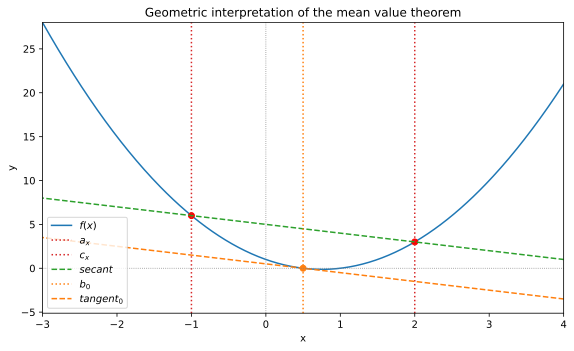

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
# %% Exercise 2
#    Create a functio to make an informative plot of the MVT

b = MVT(f,a,c)

f_lambda  = sym.lambdify(x,f,'numpy')
df_lambda = sym.lambdify(x,sym.diff(f),'numpy')

xx = np.linspace(a-2,c+2,400)
yy = f_lambda(xx)

# Plot
phi = (1 + np.sqrt(5)) / 2
plt.figure(figsize=(5*phi,5))

plt.plot(xx,yy,label='$f(x)$')
plt.plot(a,f_lambda(a),'ro')
plt.axvline(x=a,color='tab:red',linestyle=':',label='$a_x$')

plt.plot(c,f_lambda(c),'ro')
plt.axvline(x=c,color='tab:red',linestyle=':',label='$c_x$')

sec_x = np.array([a-5,c+5])
sec_y = df_lambda(b)*np.array(sec_x-a) + f_lambda(a)
plt.plot(sec_x,sec_y,'--',color='tab:green',label=f'$secant$')

for i,b_vals in enumerate(b):
    plt.plot(b_vals,f_lambda(b_vals),'o',color='tab:orange')
    plt.axvline(x=b_vals,color='tab:orange',linestyle=':',label=f'$b_{i}$')
    tang_x = [b_vals-5,b_vals+5]
    tang_y = df_lambda(b_vals)*np.array(tang_x-b_vals) + f_lambda(b_vals)
    plt.plot(tang_x,tang_y,'--',color='tab:orange',label=f'$tangent_{i}$')

plt.title("Geometric interpretation of the mean value theorem")
plt.xlabel("x")
plt.ylabel("y")
plt.axvline(x=0,color='grey',linestyle=':',linewidth=0.8)
plt.axhline(y=0,color='grey',linestyle=':',linewidth=0.8)
plt.xlim(min(xx),max(xx))
plt.ylim(min(yy)-5,max(yy))
plt.legend()
plt.tight_layout()

plt.savefig('fig9_codechallenge_106_exercise_2.png')
plt.show()
files.download('fig9_codechallenge_106_exercise_2.png')

